In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/MNIST_data/", one_hot = True)

Extracting /MNIST_data/train-images-idx3-ubyte.gz
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
learning_rate = 0.01 
training_epochs = 10 
batch_size = 256 
display_step = 1 
examples_to_show = 4 

In [16]:
n_hidden_1 = 256   
n_hidden_2 = 128 
n_input = 784 
X = tf.placeholder("float", [None, n_input])


In [17]:
# now intializing the weight for both encoding and decoding 
weights = {'encoder_h1': tf.Variable\
           (tf.random_normal([n_input, n_hidden_1])), 
           'encoder_h2': tf.Variable\
           (tf.random_normal([n_hidden_1, n_hidden_2])),
           'decoder_h1': tf.Variable\
           (tf.random_normal([n_hidden_2, n_hidden_1])),
           'decoder_h2': tf.Variable\
           (tf.random_normal([n_hidden_1, n_input]))}

In [33]:
# now same we intialize the bias for both encoding and decoding 
biases = {'encoder_b1': tf.Variable\
           (tf.random_normal([n_hidden_1])), 
           'encoder_b2': tf.Variable\
           (tf.random_normal([ n_hidden_2])),
           'decoder_b1': tf.Variable\
           (tf.random_normal([ n_hidden_1])),
           'decoder_b2': tf.Variable\
           (tf.random_normal([ n_input]))}

In [34]:
# it encodes the input data 
encoder_in = tf.nn.sigmoid(tf.add(tf.matmul(X,weights['encoder_h1']),biases['encoder_b1']))
print(encoder_in.shape)
print(weights['encoder_h2'].shape)
print(biases['encoder_b2'].shape)
# in this we convert 756 feature into 256 feature by this function which make the equation for reducing the feature

(?, 256)
(256, 128)
(128,)


In [35]:
# in above encoder_in we get the 256 feature by which we further we get 128 featue (by encoder out equation format)
encoder_out = tf.nn.sigmoid(tf.add(tf.matmul(encoder_in,weights['encoder_h2']),biases['encoder_b2']))

In [37]:
# in this we decode the 128 feature to 256 feature 
decoder_in = tf.nn.sigmoid(tf.add(tf.matmul(encoder_out,weights['decoder_h1']),biases['decoder_b1']))

In [38]:
# in this we decode 256 feature to 756 feature as the output 
decoder_out = tf.nn.sigmoid(tf.add (tf.matmul(decoder_in,weights['decoder_h2']),biases['decoder_b2']))

In [39]:
y_pred = decoder_out
y_true = X


In [42]:
# in this section we make cost function and optimizer and intialze all the variable 
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) 
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost) 
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [45]:
with tf.Session() as sess: 
    sess.run(init)     
    total_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, c = sess.run([optimizer, cost],feed_dict={X: batch_xs})
        if(epoch % display_step )== 0:
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    

Epoch: 0001 cost= 0.191564813
Epoch: 0002 cost= 0.158223867
Epoch: 0003 cost= 0.142178461
Epoch: 0004 cost= 0.132345155
Epoch: 0005 cost= 0.123570286
Epoch: 0006 cost= 0.119165801
Epoch: 0007 cost= 0.116798945
Epoch: 0008 cost= 0.111994490
Epoch: 0009 cost= 0.112105794
Epoch: 0010 cost= 0.109982416
Optimization Finished!


C:\Users\vibhu\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


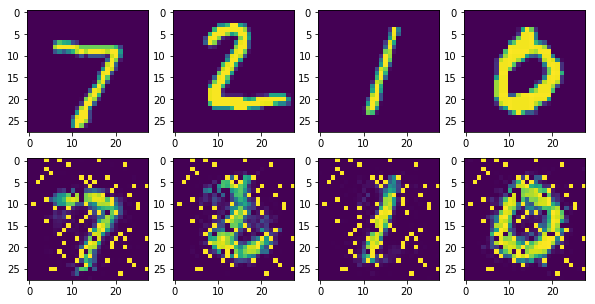

In [46]:
f, a = plt.subplots(2, 4, figsize=(10, 5))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28))) 
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()     
plt.show() 